# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [135]:
#load and inspect the data
df = 0
# YOUR CODE HERE
df=pd.read_csv("reg_data.csv")
X=df['X']
Y=df['Y']
df
# df.describe()



,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [16]:
assert df.shape == (100,2)

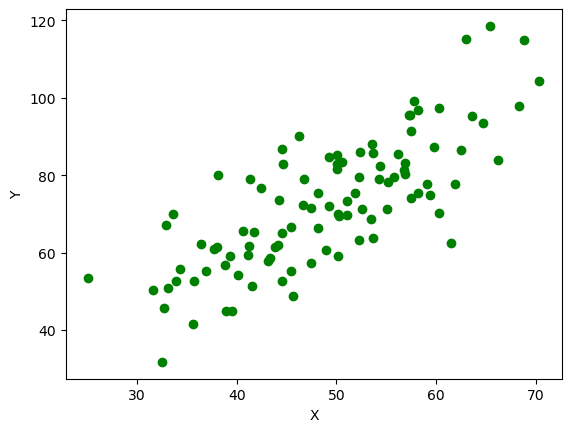

In [20]:
#plot the data (scatter)
# YOUR CODE HERE
plt.scatter(df['X'],df['Y'],c='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [150]:
# YOUR CODE HERE
# splitting the data
#  we tain 80% of data and test 20% to check the accuarcy of our model and data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size =0.2, random_state = 0)


In [151]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [154]:
x =df['X'].values
y =df['Y'].values
x_mean=np.mean(x)
print(x_mean)


48.95834146155938


In [155]:
#implement a least squares function to find a, b

x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0

# YOUR CODE HERE
# b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2
# a = y_mean - b * x_mean
x_mean=np.mean(x)
y_mean =np.mean(y)
count =0
count2=0
for i in range(len(x)):
    x_diff = (x[i]-x_mean)
    y_diff = (y[i]-y_mean)
    count += x_diff * y_diff
    count2 += (x[i]-x_mean)**2
b= count/count2
a = y_mean - (b*x_mean)
print(b)
print(a)

1.3224310227553586
7.991020982270413


In [160]:
#implement a least squares function to find a, b on split data
x_mean1 = 0
y_mean1 = 0
b_upper1 = 0
b_lower1 = 0
b1 = 0
a1 = 0

# YOUR CODE HERE
# b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2
# a = y_mean - b * x_mean
x_mean1=np.mean(x_train.values)
y_mean1 =np.mean(y_train.values)
count =0
count2=0
for i in range(len(x_train)):
    x_diff = (x_train.values[i]-x_mean1)
    y_diff = (y_train.values[i]-y_mean1)
    count += x_diff * y_diff
    count2 += (x_train.values[i]-x_mean1)**2
b1= count/count2
a1 = y_mean1 - (b*x_mean1)
print(b1)
print(a1)

1.3450919020620415
7.783549011053694


In [161]:
  print("The best line equation is: " + 
        "%.2f" % b1
         + "x + " + 
         "%.2f" % a1)

The best line equation is: 1.35x + 7.78


In [58]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

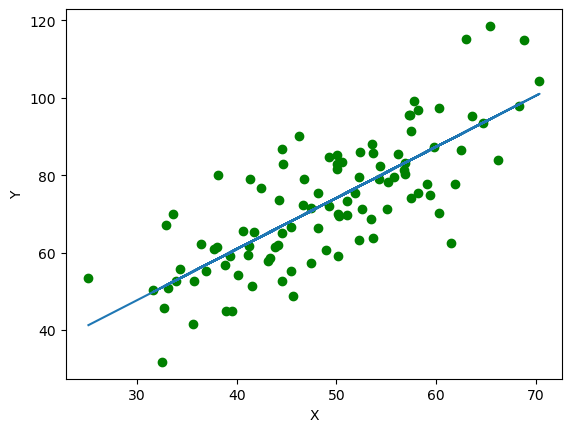

In [162]:
line = 0
# x = np.array([])
# YOUR CODE HERE
line =a + (b*x)
plt.plot(x,line)
# plt.show()
plt.scatter(df['X'],df['Y'],c='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [67]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [124]:
# YOUR CODE HERE
# df["class"] = line
# class_0 =[y[i] if y[i]  line[i] else 0 for i in range(len(x))]
# # raise NotImplementedError()
# df["class_0"]=class_0


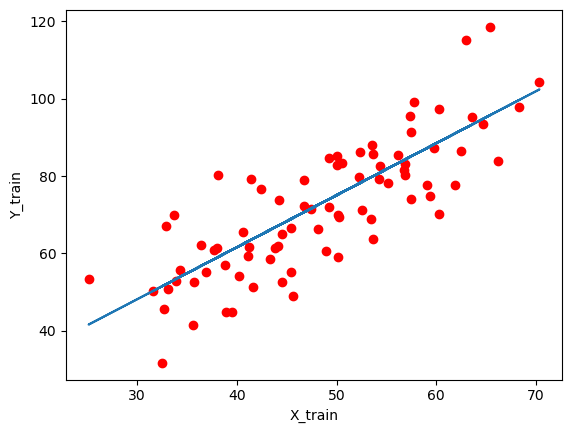

In [165]:
# plot with split data linear regression
line1 = 0
# x = np.array([])
# YOUR CODE HERE
line1 =a1 + (b1*x_train.values)
plt.plot(x_train.values,line1)
plt.scatter(x_train.values,y_train.values,c='r')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

In [176]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []
class_0_x =[]
class_1_x =[]
# YOUR CODE HERE
for i in range(len(x_test)):
    if y_test.values[i] < a1+(b1*x_test.values[i]):
        class_0.append(y_test.values[i])
        class_0_x.append(x_test.values[i])
    else: 
        class_1.append(y_test.values[i])
        class_1_x.append(x_test.values[i])
# raise NotImplementedError()
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)


(11,)
(9,)


In [172]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

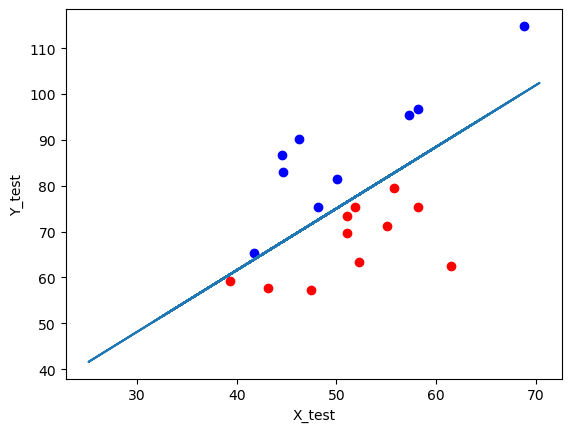

In [178]:
# YOUR CODE HERE
plt.plot(x_train.values,line1)
plt.scatter(class_0_x,class_0,c='r')
plt.scatter(class_1_x,class_1,c='b')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.show()

In [179]:
# get the total error for the classes

err = 0
# YOUR CODE HERE

for i in range(len(x)):
    err += y[i]- (a+b*x[i])
err

1.8403056856186595e-12

In [182]:
# get the total error for the classes from split data
err1 = 0
# YOUR CODE HERE

for i in range(len(x_test)):
    err1 += y_test.values[i] - (a1+(b1*x_test.values[i]))
err1

-2.5079632896239374

In [ ]:
assert err - 201 < 20

In [147]:
# linear regression class 
from sklearn.linear_model import LinearRegression
clf = LinearRegression() #classifier object of this class
